# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaninig</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

## Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

## Question(s) for Analysis

###### Question 1: What is the highest and the least voted film?
###### Question 2:What is the film having the highest profit?
###### Question 3: What is the film having the highest popularity in 1966?

In [1]:
# Import statements.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.shape

(10866, 21)

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='cleaning'></a>
# Data Cleaning.


In [7]:
# Drop  the unused columns from the dataframe.
df.drop(columns = ['imdb_id','homepage','tagline','keywords','overview','release_date'\
                   ,'vote_count','budget_adj','revenue_adj'],inplace = True)

### Drop the not a number rows and the rows having value of 0 from the dataframe.

In [8]:
df = df[(df.budget != 0)]

In [9]:
df = df[(df.revenue != 0)]

In [10]:
df = df[(df.runtime != 0)]

In [11]:
df.dropna(inplace = True)

In [12]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year
count,3806.000000,3806.000000,3.806000e+03,3.806000e+03,3806.000000,3806.000000,3806.000000
mean,40040.938518,1.203625,3.760600e+07,1.089450e+08,109.346558,6.170257,2001.231477
std,67576.835878,1.480407,4.231641e+07,1.772829e+08,19.845063,0.792560,11.329019
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,2.200000,1960.000000
25%,5932.500000,0.470673,1.000000e+07,1.429262e+07,96.000000,5.700000,1995.000000
50%,11255.000000,0.810226,2.500000e+07,4.620904e+07,106.000000,6.200000,2004.000000
75%,38703.500000,1.387058,5.000000e+07,1.260625e+08,119.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,8.400000,2015.000000


In [13]:
# Drop the duplicates.
df.drop_duplicates(inplace = True)

In [14]:
df.shape

(3805, 12)

<a id='eda'></a>
## Exploratory Data Analysis

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'release_year'}>, <Axes: >, <Axes: >]],
      dtype=object)

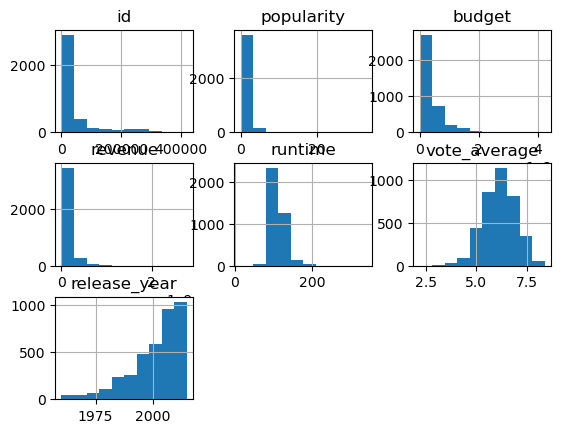

In [15]:
#Plot histograms to know the dirstibution for the datframe.
df.hist()

##### We can conclude that:
>The 'budget','revenue','popularity' and 'runtime' is skewed to the right.

> The 'release year' is skewed to the left.

> The 'vote average' is normally distributed.

<Axes: xlabel='budget', ylabel='revenue'>

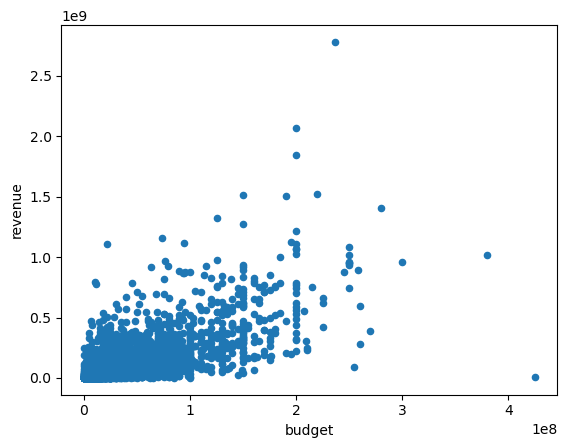

In [16]:
# Plot a scatter plot to know if there is a relation between budget and revenue.
df.plot(x = 'budget', y = 'revenue', kind='scatter')

###### From the above scatter plot we can conclude that there is a positive correlation between budget and revenue.

### Research Question 1 (What is the top and the least rated film?)

In [17]:
# maximum vote average.
df['vote_average'].max()

8.4

In [18]:
# use query in searching for the film having maximum vote average.
df.query('vote_average == 8.4000000000000004')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year
4178,278,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142,Drama|Crime,Castle Rock Entertainment,8.4,1994
7948,24128,0.283191,1200000,4978922,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,88,Documentary|Music,Talking Heads|Arnold Stiefel Company,8.4,1984


In [19]:
# minimum vote average.
df['vote_average'].min()

2.2

In [20]:
# use query function in searching for the film having minimum vote average.
df.query('vote_average == 2.2000000000000002')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year
4859,116977,0.111351,65000000,73706,Foodfight!,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...,Lawrence Kasanoff,87,Animation|Action|Comedy|Family,Threshold Entertainment|Lions Gate Family Ente...,2.2,2012


### Research Question 2  (Who is the director of the film having the highest profit?
### And what is his other film's profit looks like?)

In [21]:
# Add new column for the profit.
# Use the insert function to do this.
# (profit = revenue - budget).
profit = df['revenue'] - df['budget']
df.insert(4, "profit", profit, True)

In [22]:
# The highest profit.
df['profit'].max()

2544505847

In [23]:
# Use query function to extract the film having the highest profit.
df.query('profit == 2544505847')

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year
1386,19995,9.432768,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,7.1,2009


In [24]:
# Creat a dataframe which include all the films directed by 'james cameron'.
james_cameron = df.query('director == "James Cameron"')

Text(0, 0.5, 'Film Profit')

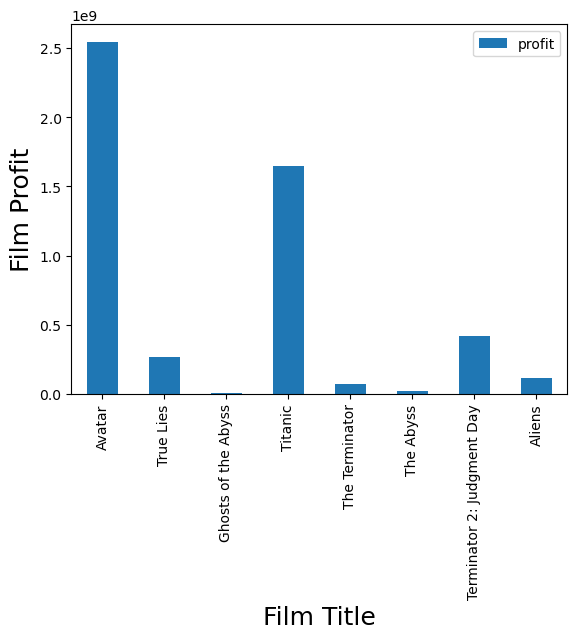

In [25]:
# Plot a bar chart to know the ratio between the profits of the films directed by 'james cameron'.
james_cameron.plot(x = 'original_title', y = 'profit', kind = 'bar')
plt.xlabel('Film Title',fontsize = 18)
plt.ylabel('Film Profit',fontsize = 18)

###### From the above bar chart we can conclude that there is a varity in profit for the films directed by 'james cameron'.
###### Not all of them are high and not all of them are low.

### Research Question 3  (What is the highest and lowest popularity film in 1966?)

In [26]:
# Create a Function to extract the maximum and minimum popularity for specific year.
def popularity (year):
    # Extract the films released in the inputed year.
    pop = df[df['release_year'] == year]
    # Print the maximum and minimum popularities for the inputed year.
    print('the maximim and the minimum popularity is ')
    return pop['popularity'].max(),pop['popularity'].min()

In [27]:
#Callling the popularity function for the year 1966.
popularity(1966)

the maximim and the minimum popularity is 


(0.670273999999999, 0.207257)

In [28]:
# Use the query function to extract the film having the maximum popularity in 1966.
df.query('popularity == 0.67027399999999904')

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year
10822,396,0.670274,7500000,33736689,26236689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,Chenault Productions,7.5,1966


In [29]:
# Use the query function to extract the film having the minimum popularity in 1966.
df.query('popularity == 0.20725700000000002')

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year


### Research Question 4  (Is the number of films created has changed from 1960 untill 2015?)

Text(0, 0.5, 'No of films')

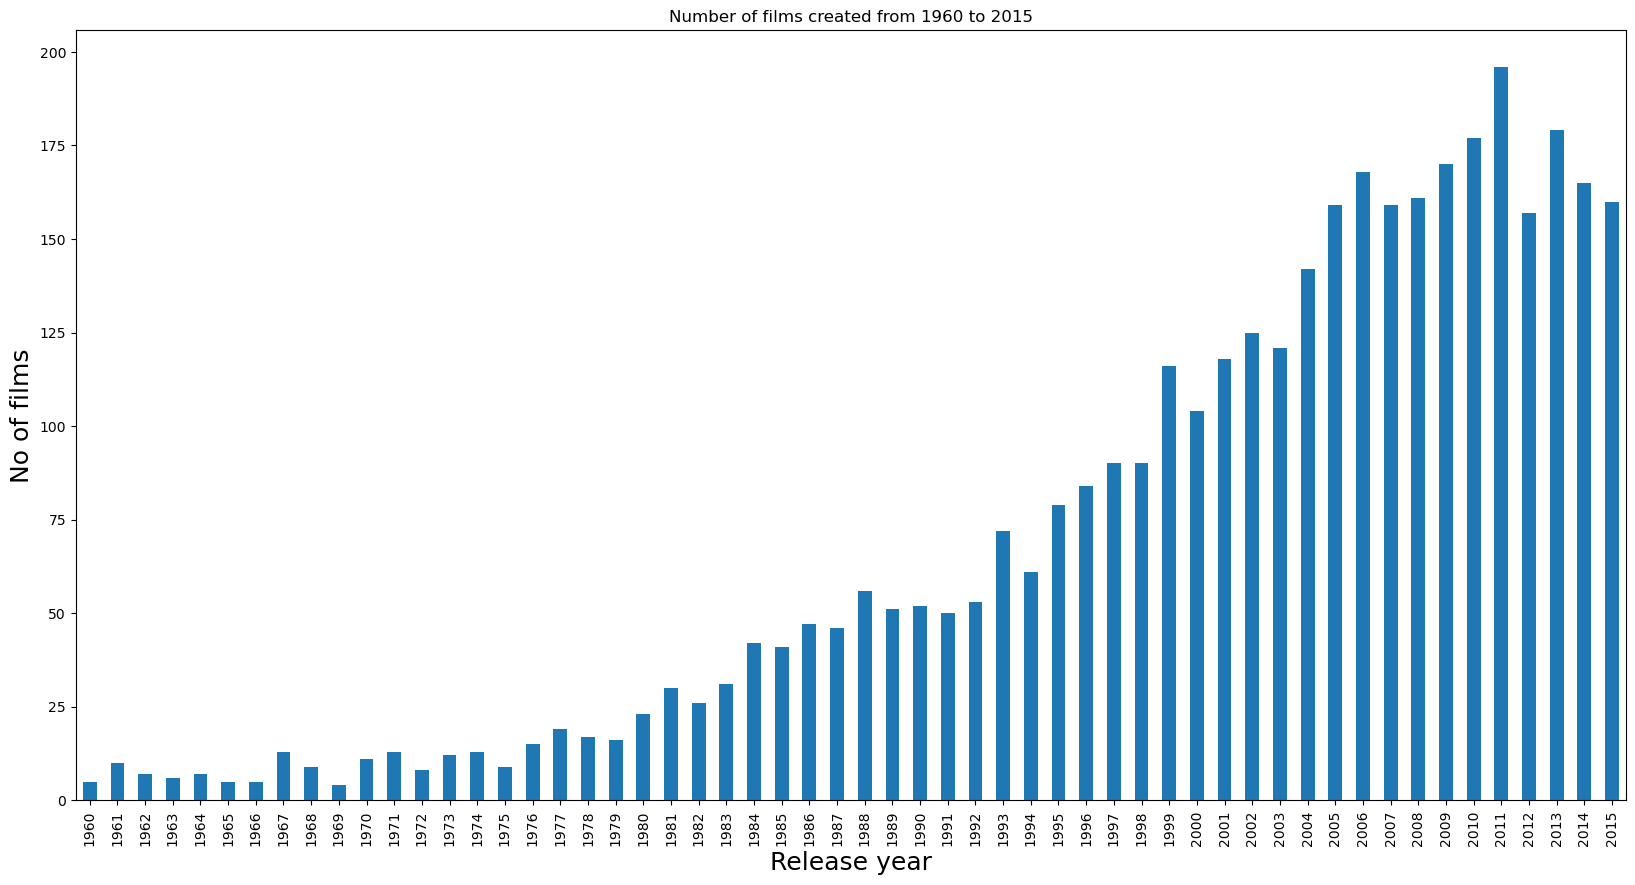

In [30]:
#The number of films created each year from 1960 untill 2015.
df.groupby('release_year')['original_title'].count().plot(kind='bar',title='Number of films created from 1960 to 2015',figsize=(20,10), color='tab:blue')
plt.xlabel('Release year',fontsize = 18)
plt.ylabel('No of films',fontsize = 18)

<a id='conclusions'></a>
## Conclusions

> At the first we observed the top rated film ('The Shawshank Redemption','Stop Making Sense') and the least rated film ('Foodfight!') between 1960 and 2015.

> Then We observed that the highest profit come from a film from 1960 to 2015 was 'Avatar' who's director is 'James Cameron' and we make a bar chart to know the ratio between his other film's profits.

> After that we knew which film in 1966 is having the highest popularity ('Who's Afraid of Virginia Woolf?') and which one is having the lowest popularity ('Fantastic Voyage').

> By the bar chart created at the end we can conclude that as time pass the number of the produced films is increasing.

## Finally for the future analysis:
> We have to include the budget and the revenue for the films and not to make it empty or fill it with zeros.

> We don't have to include the exact date of the film created (day or month) we only need the year the film created.

> We don't have to include the vote count as we already have the vote average.

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1